Close Figure 1 window to continue...


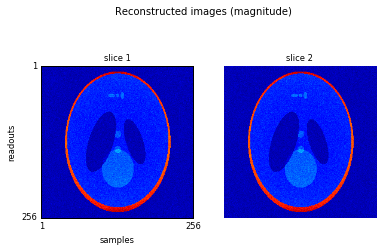

writing to Gfsout.h5
Close Figure 1 window to continue...


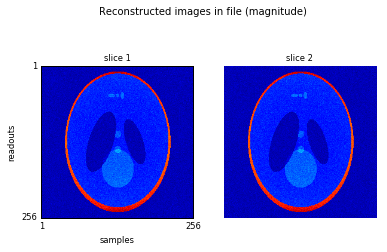

In [1]:
#'''
#Lower-level interface demo that illustrates creating and running a chain
#of gadgets - shortest version.
#
#Usage:   JUPYTER EDITED NAME
#  fully_sampled_recon_single_chain_short.py [--help | options]
#
#Options:
#  -f <file>, --file=<file>    raw data file
#                              [default: simulated_MR_2D_cartesian.h5]
#  -p <path>, --path=<path>    path to data files, defaults to data/examples/MR
#                              subfolder of SIRF root folder
#  -o <file>, --output=<file>  images output file
#'''
#
## CCP PETMR Synergistic Image Reconstruction Framework (SIRF)
## Copyright 2015 - 2017 Rutherford Appleton Laboratory STFC
## Copyright 2015 - 2017 University College London.
##
## This is software developed for the Collaborative Computational
## Project in Positron Emission Tomography and Magnetic Resonance imaging
## (http://www.ccppetmr.ac.uk/).
##
## Licensed under the Apache License, Version 2.0 (the "License");
##   you may not use this file except in compliance with the License.
##   You may obtain a copy of the License at
##       http://www.apache.org/licenses/LICENSE-2.0
##   Unless required by applicable law or agreed to in writing, software
##   distributed under the License is distributed on an "AS IS" BASIS,
##   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
##   See the License for the specific language governing permissions and
##   limitations under the License.

__version__ = '0.1.0'
from docopt import docopt

# import engine module
from pGadgetron import *

# process command-line options
data_file = 'simulated_MR_2D_cartesian.h5'
data_path = petmr_data_path('mr')
output_file = 'Gfsout.h5'



# locate the input data
input_file = existing_filepath(data_path, data_file)
acq_data = AcquisitionData(input_file)

# create reconstruction object
recon = Reconstructor(['RemoveROOversamplingGadget', \
    'SimpleReconGadgetSet'])
# reconstruct images
image_data = recon.reconstruct(acq_data)
# show reconstructed images
image_array = image_data.as_array()
title = 'Reconstructed images (magnitude)'
%matplotlib inline
show_3D_array(abs(image_array), suptitle = title, \
                  xlabel = 'samples', ylabel = 'readouts', label = 'slice')

if output_file is not None:
    # write images to a new group /dataset in args.output
    print('writing to %s' % output_file)
    image_data.write(output_file, 'dataset')
    # demonstrate reading from file
    test_image = ImageData()
    test_image.read_from_file(output_file)
    image_array = test_image.as_array()
    title = 'Reconstructed images in file (magnitude)'
    show_3D_array(abs(image_array), suptitle = title, \
                    xlabel = 'samples', ylabel = 'readouts', label = 'slice')
